In [56]:
import pandas as pd

# Load the dataset
parameter_based_df = pd.read_csv('../data/parameter_based_dataset.csv')

# Display the first few rows of the dataframe to understand its structure
parameter_based_df.head()

,prompt,completion
0,Create a website marketing campaign for a Chec...,"""Explore the world while we handle your finan..."
1,Design an email for a Savings Account promotio...,"""Welcome home to savings that grow with you. ..."
2,Craft a social media post advertising a Mortga...,"""Turn your work abroad into a home. Our Globa..."
3,Compose an enticing email offer for a Student ...,"""Kickstart your university life with our Campu..."
4,Develop a social media update on the benefits ...,"""Young savers\t it's time to make your money ..."


#### Selecting articles that might directly or indirectly relate to checking, savings, or credit card products based on the prompts and responses

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/diegobolanos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


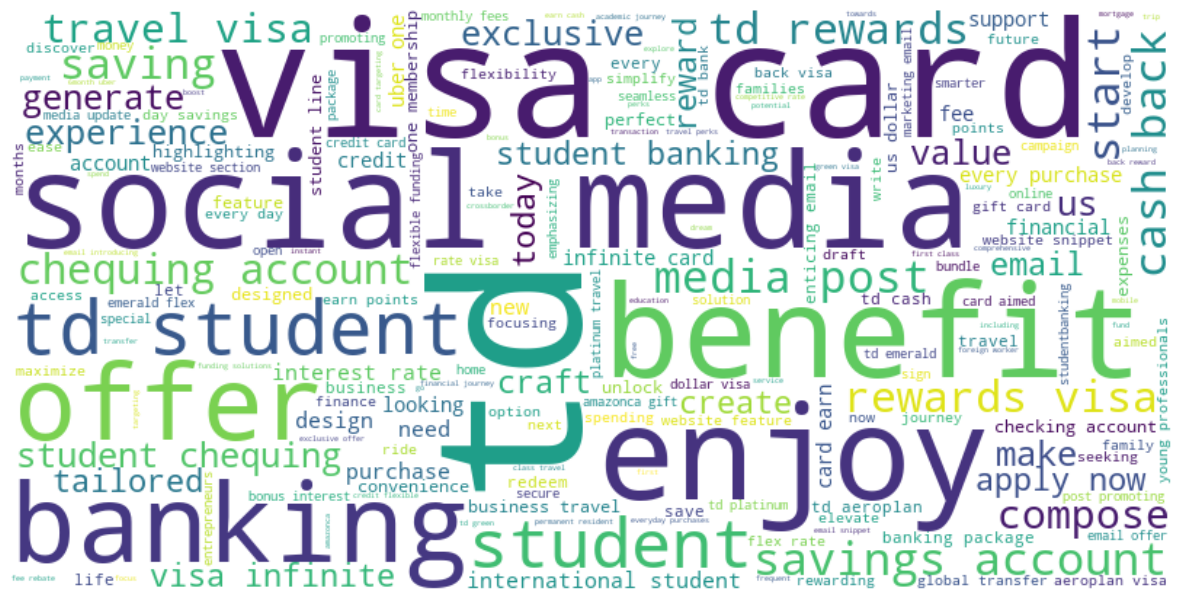

In [57]:
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Ensure stopwords are downloaded
nltk.download('stopwords')

# Combine all text from 'prompt' and 'completion' columns
all_text = ' '.join(parameter_based_df['prompt']) + ' ' + ' '.join(parameter_based_df['completion'])

# Lowercase and remove punctuation
all_text_clean = re.sub(r'[^\w\s]', '', all_text.lower())

# Generate a word cloud image
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(all_text_clean)

# Display the generated image:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


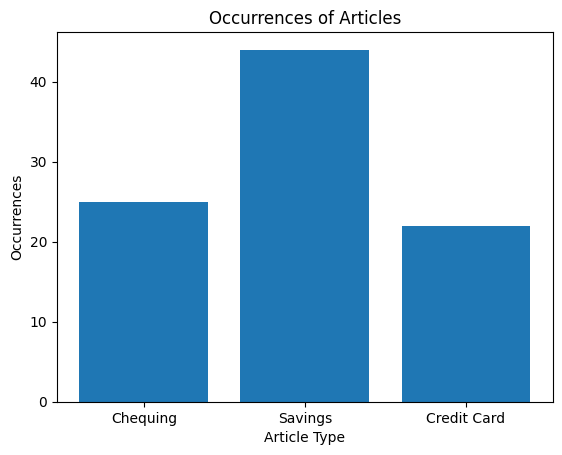

In [61]:
prompt = parameter_based_df['prompt']
completion = parameter_based_df['completion']

# Filter the articles based on the presence of keywords in the prompts and completions
checking_articles = parameter_based_df[(prompt.str.contains('chequing', case=False)) | (completion.str.contains('chequing', case=False))]
savings_articles = parameter_based_df[(prompt.str.contains('savings', case=False)) | (completion.str.contains('savings', case=False))]
credit_card_articles = parameter_based_df[(prompt.str.contains('credit', case=False)) | (completion.str.contains('credit', case=False))]

# Display the filtered articles
occurrences = [checking_articles.shape[0], savings_articles.shape[0], credit_card_articles.shape[0]]
labels = ['Chequing', 'Savings', 'Credit Card']

plt.bar(labels, occurrences)
plt.xlabel('Article Type')
plt.ylabel('Occurrences')
plt.title('Occurrences of Articles')
plt.show()

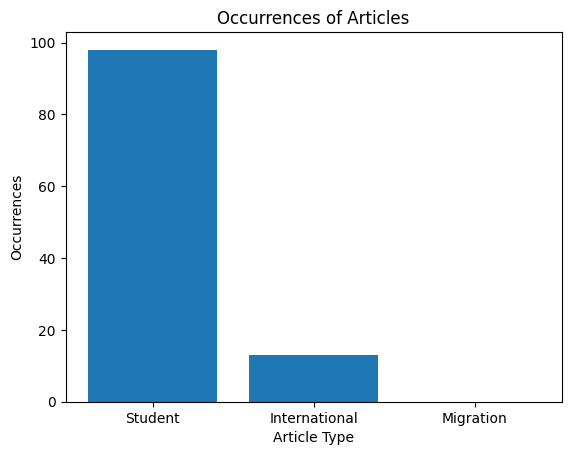

In [66]:
# Filter the articles based on the presence of keywords in the prompts and responses
students = parameter_based_df[(prompt.str.contains('student', case=False)) | (completion.str.contains('student', case=False))]
international = parameter_based_df[(prompt.str.contains('professionals', case=False)) | (completion.str.contains('professionals', case=False))]
migration = parameter_based_df[(prompt.str.contains('migration', case=False)) | (completion.str.contains('migration', case=False))]

# Display the filtered articles
occurrences = [students.shape[0], international.shape[0], migration.shape[0]]
labels = ['Student', 'International', 'Migration']

plt.bar(labels, occurrences)
plt.xlabel('Article Type')
plt.ylabel('Occurrences')
plt.title('Occurrences of Articles')
plt.show()